<a href="https://colab.research.google.com/github/kodeu/smartphones_prices/blob/random_forest/phones_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving smartphones.csv to smartphones (1).csv
User uploaded file "smartphones (1).csv" with length 146107 bytes
Random Forest MSE: 39020.87292255891
Coefficient of Determination (R^2): 0.792782243597114


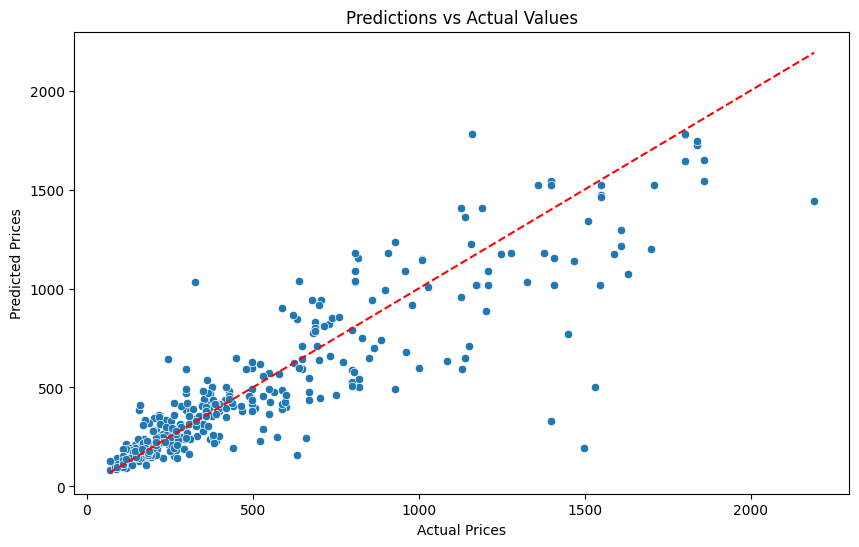

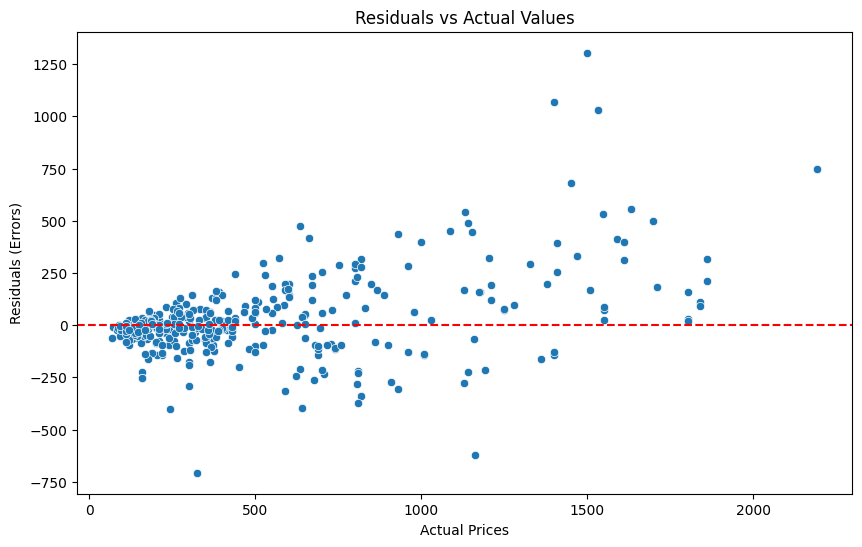

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from google.colab import files
import pandas as pd
import io
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

uploaded = files.upload()
for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))

X = data.drop(columns=['Final Price', 'Smartphone'])
y = data['Final Price']

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
tree_predictions = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, tree_predictions)
print("Random Forest MSE:", forest_mse)
print("Coefficient of Determination (R^2):", r2_score(y_test, tree_predictions))

#plotting
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x=y_test, y=tree_predictions)  # Create a scatter plot
plt.title('Predictions vs Actual Values')  # Set title
plt.xlabel('Actual Prices')  # Set x-axis label
plt.ylabel('Predicted Prices')  # Set y-axis label

# Plot a line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.show()

#plotting residuals
residuals = y_test - tree_predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals (Errors)')
plt.axhline(y=0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()